In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2017-07-26 16:16:59


In [8]:
from invisible_cities.database import load_db
from invisible_cities.io   import pmap_io          as pio
import invisible_cities.reco.peak_functions_c as cpf

from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.types.ic_types import minmax
import invisible_cities.icaro.mpl_functions as mpl
from invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.icaro.pmaps_mpl import plot_s2si_map

In [47]:
from invisible_cities.daemons.histograms import H1d

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
run_number = -4446
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()

In [5]:
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)

In [7]:
PMP_file = os.path.join(os.environ['IC_DATA'], 'MC_PreProd_July_2017',
                        'dst_NEXT_v1_00_05_Tl_ACTIVE_0_0_7bar_PMP_1000.h5')
print('PMP file = {}'.format(PMP_file))

PMP file = /Users/jjgomezcadenas/Projects/ICDATA/MC_PreProd_July_2017/dst_NEXT_v1_00_05_Tl_ACTIVE_0_0_7bar_PMP_1000.h5


In [10]:
s1_dict, s2_dict, s2si_dict = pio.load_pmaps(PMP_file)

In [20]:
s1_dict[0]

S1 (number of peaks = 1)
peak number = 0: Peak(samples = 8 width =      0.2 mus , energy =     47.0 pes
        height =      8.1 pes tmin-tmax = minmax(min=100.075, max=100.25) mus  

In [17]:
s1l = len(s1_dict)

In [19]:
nof_peaks = np.zeros(s1l)
s1_samples = np.zeros(s1l)
s1_width = np.zeros(s1l)
s1_energy = np.zeros(s1l)
s1_height = np.zeros(s1l)


In [36]:
for i, s1 in enumerate(s1_dict.values()):
    nof_peaks[i] = s1.number_of_peaks
    peak = s1.peak_waveform(0)
    s1_samples[i] = peak.number_of_samples
    s1_width[i]   = peak.width
    s1_energy[i]  = peak.total_energy
    s1_height[i]  = peak.height
    

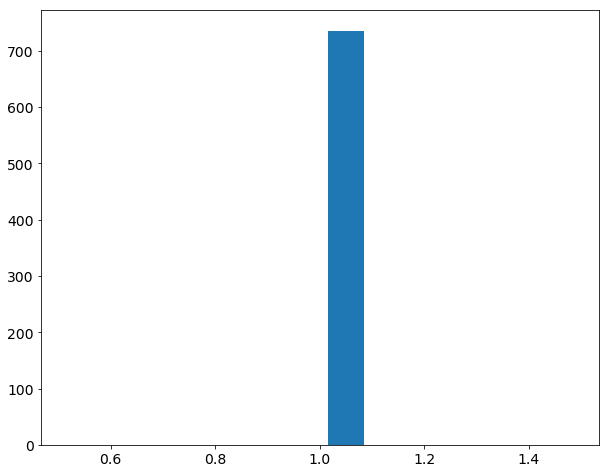

In [45]:
h_nof_peaks = H1d('nof_peaks', nof_peaks)
h_nof_peaks.plot()

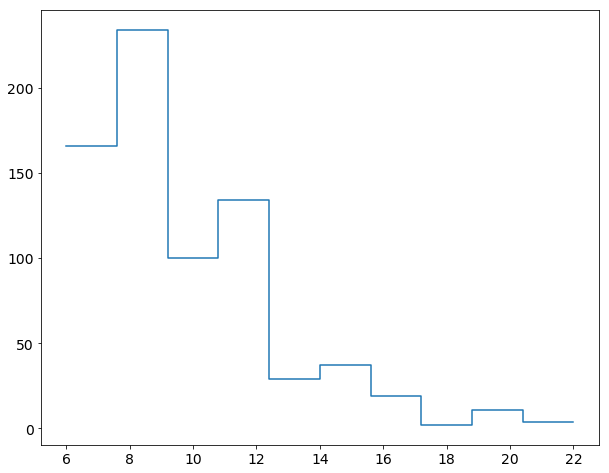

In [49]:
h_s1_samples = H1d('s1_samples', s1_samples)
h_s1_samples.plot(opt='solid')

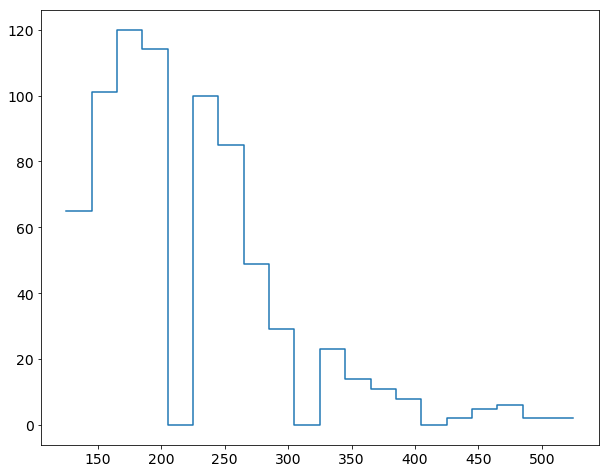

In [51]:
h_s1_width = H1d('s1_width', s1_width, bins=20)
h_s1_width.plot(opt='solid')

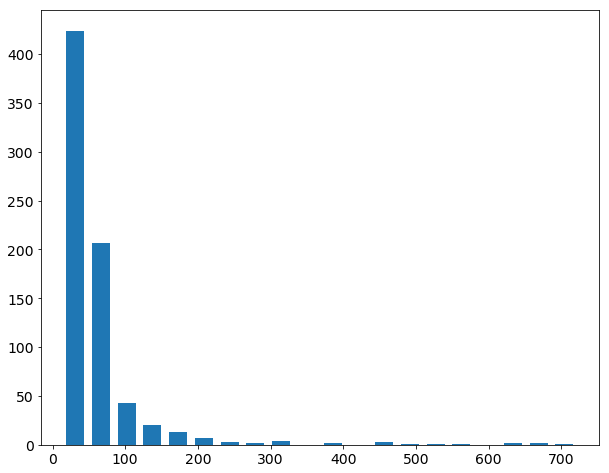

In [56]:
h_s1_energy = H1d('s1_energy', s1_energy, bins=20)
h_s1_energy.plot()

In [52]:
import pandas as pd

In [54]:
s = pd.Series(h_s1_energy.hist)


In [58]:
print(s)

0     424
1     207
2      43
3      20
4      13
5       7
6       3
7       2
8       4
9       0
10      2
11      0
12      3
13      1
14      1
15      1
16      0
17      2
18      2
19      1
dtype: int64


In [59]:
print(h_s1_energy.hist)

[424 207  43  20  13   7   3   2   4   0   2   0   3   1   1   1   0   2
   2   1]


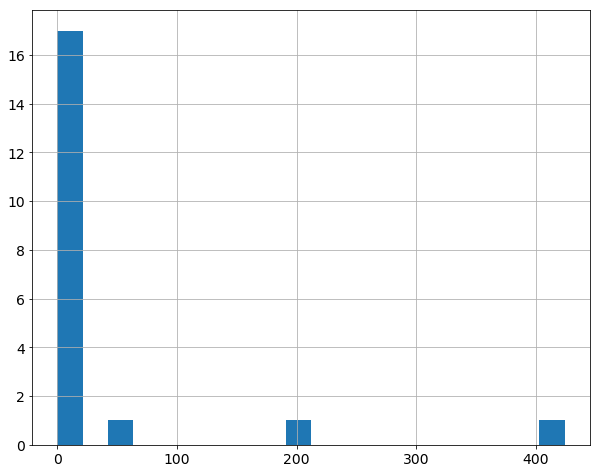

In [61]:
s.hist(bins=20)

In [ ]:
with tb.open_file(rwf_path, 'r+') as f_rwfs:
    events = [f_rwfs.root.Run.events[i][0] for i in range(len(f_rwfs.root.Run.events[:]))]
nevts = len(events)
s1_dict, s2_dict, s2si_dict = pio.load_pmaps(pmap_path)